In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Convolution DFT and FFT- Claudia and Maor

## Q1

### Part 1

We'll look at linear convolution:

$$
(f*g)(n) = \sum_{m \in \mathbb{Z}} f(m)g(n-m)
$$



We'll define an array of zeros S of length N, and then we'll add to S[i] f[i] \cdot g[j] for i+j=k.

meaning we get:

$$
S[n] = 0 +\sum_{i,j \in \mathbb{Z}, i+j = n} f[i] \cdot g[j] = \sum_{i,j \in \mathbb{Z}, i+j = n} f[i] \cdot g[n-i] = \sum_{i \in \mathbb{Z}} f[i] \cdot g[n-i] = f*g[n]
$$








## Part 2

Moving on, let's define the support: 

A support of a signal is the set of indices where the signal is non-zero.

Now in this part we know $Supp_f = {0,...N-1}$ and $Supp_g = {0,...M-1}$

Now we'll look at the support of the convolution:

$$
Supp_{f*g} = Supp_{S} = \left( n | S[n] \neq 0 \right) = \left( n | \sum_{i \in \mathbb{Z}} f[i] \cdot g[n-i] \neq 0 \right) = \left( n | \sum_{i \in [0,N-1], n = i +i\\ j \in [0,M-1]} f[i] \cdot g[j]  \right)
$$


Thus we can write:

$$
\sum_{m \in [0,N-1]\\ n-m \in [0,M-1]} f[m] \cdot g[n-m] = \sum_{m \in [0,N-1]\\ n-m \in [0,M-1]} f[m] \cdot g[n-m] + \sum_{m \notin [0,N-1]\\ n-m \in [0,M-1]} f[m] \cdot g[n-m] = \sum_{m \in [0,N-1]\\ n-m \in [0,M-1]} f[m] \cdot g[n-m] + 0 
$$
Thus, we can coclude:

$$
0 \leq m \leq N-1
\\
0 \leq n-m \leq M-1
\\
0 \leq 0 + m \leq n \leq M-1+m \leq M-1+N-1 = M+N-2
$$

Therefore the support of the convolution is $Supp_{f*g} \subseteq \{0,...,M+N-2\}$

Now, we'll want to show the other direction.

Let $n \in \{0,...,M+N-2\}$, we'll show that $n \in Supp_{f*g}$.

Let's define $m = n-j$ where $j \in \{0,...,M-1\}$, thus $m \in \{0,...,N-1\}$

#### (i) For n < 0 we get:

if $m \leq 0$:

g[n-m] = 0.

Else, if m < 0:

f[m] = 0.

Thus, we get that for each m and n < 0, $f[m] \cdot g[n-m] = 0$.

#### (ii) For $n \geq M+N-1 \quad \text{we get}$:

if $m \geq N$:

f[m] = 0.

Else, if m < N:

g[n-m] = 0.

Thus, we get that for each m and $n \geq M+N-1$, $f[m] \cdot g[n-m] = 0$.

In summary we proved that the support for f*g(n) is included in $\{0,...,M+N-2\}$.

## Part 3

In this section we'll compute manually the convolution of two signals:

f = [1,2,3,0] and g = [0,1,0,0.5] :

$$
(f*g)[0] = f[0] \cdot g[0] = 1 \cdot 0 = 0
\\
(f*g)[1] = f[0] \cdot g[1] + f[1] \cdot g[0] = 1 \cdot 1 + 2 \cdot 0 = 1
\\
(f*g)[2] = f[0] \cdot g[2] + f[1] \cdot g[1] + f[2] \cdot g[0] = 1 \cdot 0 + 2 \cdot 1 + 3 \cdot 0 = 2
\\
(f*g)[3] = f[0] \cdot g[3] + f[1] \cdot g[2] + f[2] \cdot g[1] + f[3] \cdot g[0] = 1 \cdot 0.5 + 2 \cdot 0 + 3 \cdot 1 = 3.5
\\
(f*g)[4] = f[1] \cdot g[3] + f[2] \cdot g[2] + f[3] \cdot g[1] = 2 \cdot 0.5 + 3 \cdot 0 + 0 \cdot 1 = 1
\\
(f*g)[5] = f[2] \cdot g[3] + f[3] \cdot g[2] = 3 \cdot 0.5 + 0 \cdot 0 = 1.5
\\
(f*g)[6] = f[3] \cdot g[3] = 0 \cdot 0.5 = 0
\\
\text{ Thus we get the convolution: } 
\\
(f*g) = [0,1,2,3.5,1,1.5,0]
$$

Let's write it in a table:

$$
\begin{matrix}
n  & h[n] \text{ Calculation}                                & h[n] \\
\hline
0  & h[0] = 1 \cdot 0                                       & 0 \\
1  & h[1] = 1 \cdot 1 + 2 \cdot 0                           & 1 \\
2  & h[2] = 1 \cdot 0 + 2 \cdot 1 + 3 \cdot 0               & 2 \\
3  & h[3] = 1 \cdot 0.5 + 2 \cdot 0 + 3 \cdot 1 + 0 \cdot 0 & 3.5 \\
4  & h[4] = 2 \cdot 0.5 + 3 \cdot 0 + 0 \cdot 1             & 1 \\
5  & h[5] = 3 \cdot 0.5 + 0 \cdot 0                         & 1.5 \\
6  & h[6] = 0 \cdot 0.5                                     & 0 \\
\end{matrix}
$$

## Part 4

Let's define th cyclic convolution:

$$
(f*g)[n] = \sum_{m = 0}^{N-1} f[m] \cdot g[n-m] = \sum_{m \in \mathbb{Z}} f[m] \cdot g[(n-m) \mod N]
$$
Here, we'll compute the cyclic convolution of the two signals f = [1,2,3,0] and g = [0,1,0,0.5] :

$$
(f*g)[0] = f[0] \cdot g[0] + f[1] \cdot g[3] + f[2] \cdot g[2] + f[3] \cdot g[1] = 1 \cdot 0 + 2 \cdot 0.5 + 3 \cdot 0 + 0 \cdot 1 = 1
\\
(f*g)[1] = f[0] \cdot g[1] + f[1] \cdot g[0] + f[2] \cdot g[3] + f[3] \cdot g[2] = 1 \cdot 1 + 2 \cdot 0 + 3 \cdot 0.5 + 0 \cdot 0 = 2.5
\\
(f*g)[2] = f[0] \cdot g[2] + f[1] \cdot g[1] + f[2] \cdot g[0] + f[3] \cdot g[3] = 1 \cdot 0 + 2 \cdot 1 + 3 \cdot 0 + 0 \cdot 0.5 = 2
\\
(f*g)[3] = f[0] \cdot g[3] + f[1] \cdot g[2] + f[2] \cdot g[1] + f[3] \cdot g[0] = 1 \cdot 0.5 + 2 \cdot 0 + 3 \cdot 1 + 0 \cdot 0 = 3.5
\\
\text{ Thus we get the cyclic convolution: }
\\
(f*g) = [1,2.5,2,3.5]
$$

And we'll sort it in table:

$$
\begin{matrix}
n  & h[n] \text{ Calculation}                                & h[n] \\
\hline
0  & h[0] = 1 \cdot 0 + 2 \cdot 0.5 + 3 \cdot 0 + 0 \cdot 1 & 1 \\
1  & h[1] = 1 \cdot 1 + 2 \cdot 0 + 3 \cdot 0.5 + 0 \cdot 0 & 2.5 \\
2  & h[2] = 1 \cdot 0 + 2 \cdot 1 + 3 \cdot 0 + 0 \cdot 0.5 & 2 \\
3  & h[3] = 1 \cdot 0.5 + 2 \cdot 0 + 3 \cdot 1 + 0 \cdot 0 & 3.5 \\
\end{matrix}
$$

## Part 5

### Definitions

1. *Zero-Padded Linear Convolution*:
   For signals $ f, g : \{0, \dots, N/2 - 1\} \rightarrow \mathbb{R} $, we can extend these signals to the set $ \{0, \dots, N-1\} $ by zero-padding:

   $$
   \tilde{f}[m] = 
   \begin{cases} 
   f[m] & \text{if } 0 \leq m \leq N/2 - 1 \\
   0 & \text{if } N/2 \leq m \leq N-1
   \end{cases}
   $$
   
   Similarly for $ \tilde{g}[m] $.

   The zero-padded linear convolution is then defined as:
   $$
   (\tilde{f} \ast \tilde{g})[n] = \sum_{m=0}^{N-1} \tilde{f}[m] \tilde{g}[n - m]
   $$
   where $ \tilde{g}[n - m] $ is considered zero for $ n - m $ outside $ \{0, \dots, N-1\} $.

2. *Cyclic Convolution*:
   The cyclic convolution is given by:
   $$
   (f \circledast g)[n] = \sum_{m=0}^{N-1} f[m] g[(n - m) \mod N]
   $$
   Here, the indices are taken modulo $ N $.

We'll show that we get the same result:

Given that $ f $ and $ g $ are supported on $ \{0, \dots, N/2 - 1\} $, after zero-padding, we have:
$$
(\tilde{f} \ast \tilde{g})[n] = \sum_{m=0}^{N/2 - 1} f[m] g[n - m] \quad \text{for} \quad n \in \{0, \dots, N-1\}
$$
However, this sum is defined in the entire range $ \{0, \dots, N-1\} $, with zeros outside the support range.

#### Cyclic Convolution

The cyclic convolution for $ n \in \{0, \dots, N-1\} $ is:
$$
(f \circledast g)[n] = \sum_{m=0}^{N-1} f[m] g[(n - m) \mod N]
$$
But since $ f[m] = 0 $ for $ m \geq N/2 $, this reduces to:
$$
(f \circledast g)[n] = \sum_{m=0}^{N/2 - 1} f[m] g[(n - m) \mod N]
$$



For $ n \in \{0, \dots, N/2 - 1\} $: The modulo operation $ (n - m) \mod N $ does not affect the result, as $ n - m $ will lie within $ \{0, \dots, N-1\} $ without wrapping around. Therefore, both the cyclic and zero-padded linear convolutions are equivalent.

For $ n \in \{N/2, \dots, N-1\} $: The cyclic convolution will wrap around, considering indices modulo $ N $. However, because $ f[m] $ and $ g[m] $ are supported within $ \{0, \dots, N/2 - 1\} $, any contribution outside this range in the cyclic convolution will result from the modulo operation, which effectively matches the behavior of the zero-padded linear convolution in this extended range.


Therefore, By zero-padding the signals $ f $ and $ g $ to extend their support to $ \{0, \dots, N-1\} $, the linear convolution $ (\tilde{f} \ast \tilde{g})[n] $ and the cyclic convolution $ (f \circledast g)[n] $ will produce the same result for all $ n \in \{0, \dots, N-1\} $. This occurs because the zero-padding ensures that the convolution sums involve the same terms in both cases.

## Q2

### Part 1

$\text{Let} \quad \omega_N = e^{\frac{2 \pi i}{N}}$

Then, we can write:

$$
(\omega_k^n)^N = (e^{\frac{2 \pi \cdot i \cdot k \cdot n}{N}})^N = e^{2 \pi \cdot i \cdot k \cdot n}
$$

We know that $n,k \in \mathbb{N}$

So we got: $\quad e^{2 \pi i \cdot m} = cos(2 \pi \cdot m) + i \cdot sin(2 \pi \cdot m) = 1 + 0 = 1$

### Part 2

#### (i) Using Complex Exponentials

$$
F = \frac{1}{2} \begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & e^{-\pi i / 2} & e^{-\pi i} & e^{-3\pi i / 2} \\
1 & e^{-\pi i} & e^{-2\pi i} & e^{-3\pi i} \\
1 & e^{-3\pi i / 2} & e^{-3\pi i} & e^{-9\pi i / 2} 
\end{pmatrix} 
$$

#### (ii) Using Powers of $\omega_4$

$\omega_4 = e^{-\frac{2\pi i}{4}} = -i$

$$
F = \frac{1}{2} \begin{pmatrix}
\omega_4^0 & \omega_4^0 & \omega_4^0 & \omega_4^0 \\
\omega_4^0 & \omega_4^1 & \omega_4^2 & \omega_4^3 \\
\omega_4^0 & \omega_4^2 & \omega_4^4 & \omega_4^6 \\
\omega_4^0 & \omega_4^3 & \omega_4^6 & \omega_4^9 
\end{pmatrix} 
$$

Substituting the values for powers of $\omega_4$:

$$
F = \frac{1}{2} \begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & -i & -1 & i \\
1 & -1 & 1 & -1 \\
1 & i & -1 & -i 
\end{pmatrix} 
$$


### Part 3

Let's prove the properties of the Discrete Fourier Transform (DFT) matrix:

A matrix $ F $ is unitary if:
$$
F F^\ast = I
$$
where $ F^\ast $ is the conjugate transpose of $ F $, and $ I $ is the identity matrix.


The conjugate transpose $ F^\ast $ of the DFT matrix is obtained by taking the transpose and then taking the complex conjugate of each element. In our case:

$$
F^\ast_{k,n} = \frac{1}{\sqrt{N}} e^{2\pi i \frac{kn}{N}}
$$


Now, let's compute the product $ F F^\ast $:
$$
[F F^\ast]_{k,m} = \sum_{n=0}^{N-1} F_{k,n} F^\ast_{n,m} = \frac{1}{N} \sum_{n=0}^{N-1} e^{-2\pi i \frac{kn}{N}} e^{2\pi i \frac{mn}{N}}
$$

$$
[F F^\ast]_{k,m} = \frac{1}{N} \sum_{n=0}^{N-1} e^{2\pi i \frac{(m-k)n}{N}}
$$


The sum $ \sum_{n=0}^{N-1} e^{2\pi i \frac{(m-k)n}{N}} $ is a known complex geometric series.

Let's separate to cases:

- If $ k = m $, the exponent becomes zero, so the sum is $ N $, and:
  $$
  [F F^\ast]_{k,m} = \frac{1}{N} \cdot N = 1
  $$
- If $ k \neq m $, the sum is a geometric series with a common ratio $ r = e^{2\pi i \frac{m-k}{N}} $, which sums to zero:
  $$
  [F F^\ast]_{k,m} = \frac{1}{N} \sum_{n=0}^{N-1} e^{\frac{2 \pi \cdot (m-k)n}{N}} = \frac{1}{N} \cdot \frac{1 - (e^{\frac{2 \pi \cdot (m-k)n}{N}})^N}{1- e^{\frac{2 \pi \cdot (m-k)}{N}}} =  \frac{1}{N} \cdot 0 = 0
  $$

Thus:
$$
F F^\ast = I
$$
which shows that $ F $ is unitary.

Moving on, let's prove the symmetry:

A matrix $ F $ is symmetric if $ F = F^T $, meaning $ F_{k,n} = F_{n,k} $ for all $ k, n $.


The elements of the DFT matrix $ F $ are given by:
$$
F_{k,n} = \frac{1}{\sqrt{N}} e^{-2\pi i \frac{kn}{N}}
$$
and
$$
F_{n,k} = \frac{1}{\sqrt{N}} e^{-2\pi i \frac{nk}{N}}
$$

Since $ F_{k,n} = F_{n,k} $, the matrix $ F $ is symmetric.


## Part 4

In previous part we showed that DFT is unitary, thus,we can say that the IDFT matrix is as follows:

$$
F^* = \frac{1}{2} \begin{pmatrix}
\omega_4^0 & \omega_4^0 & \omega_4^0 & \omega_4^0 \\
\omega_4^0 & \omega_4^1 & \omega_4^2 & \omega_4^3 \\
\omega_4^0 & \omega_4^2 & \omega_4^4 & \omega_4^6 \\
\omega_4^0 & \omega_4^3 & \omega_4^6 & \omega_4^9 
\end{pmatrix}^* = 
\frac{1}{2} \begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & i & -1 & -i \\
1 & -1 & 1 & -1 \\
1 & -i & -1 & i 
\end{pmatrix} 
$$


## Part 5

Let's perform it analytically:

Let's take f = [1,2,3,4], let's compute the DFT:

$$
F[0] = 0.5 \cdot (1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot 0} + 3 \cdot e^{-i \cdot 0} + 4 \cdot e^{-i \cdot 0}) = 10/2 = 5
\\
F[1] = 0.5 \cdot (1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{2 \pi}{4}} + 3 \cdot e^{-i \cdot \frac{4 \pi}{4}} + 4 \cdot e^{-i \cdot \frac{6 \pi}{4}}) = (1 - 2i -3 + 4i)/2 = -1 + i
\\
F[2] = 0.5 \cdot (1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{4 \pi}{4}} + 3 \cdot e^{-i \cdot \frac{8 \pi}{4}} + 4 \cdot e^{-i \cdot \frac{12 \pi}{4}}) = (1 - 2 + 3 - 4)/2 = -1 
\\
F[3] = 0.5 \cdot (1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{6 \pi}{4}} + 3 \cdot e^{-i \cdot \frac{12 \pi}{4}} + 4 \cdot e^{-i \cdot \frac{18 \pi}{4}}) = (1 + 2i - 3 - 4i)/2 = -1 - i
$$

We'll perform IDFT to get our original signal:

$$
f = \frac{1}{2} \begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & i & -1 & -i \\
1 & -1 & 1 & -1 \\
1 & -i & -1 & i 
\end{pmatrix}  \cdot \begin{pmatrix} 5 \\ -1 + i \\ -1 \\ -1 -i \end{pmatrix} =

f[0] = (5 -1 +i -1 -1 -i)/2 = 1
\\
f[1] = (5 - i - 1 + 1 + i -1)/2 = 2
\\
f[2] = (5 + 1 - i - 1 + 1 + i)/2 = 3
\\
f[3] = (5 + i + 1 + 1 - i + 1)/2 = 4
$$

Therefore, we successfuly got our signal f after IDFT

## Part 6

Let's look at $ af + bg $

Let $ h = af + bg $ be a linear combination of the signals $ f $ and $ g $. The $ n $-th element of $ h $ is:
$$
h_n = af_n + bg_n
$$

After applying the DFT to $ h $:
$$
(Fh)_k = \sum_{n=0}^{N-1} h_n \cdot e^{-2\pi i \frac{kn}{N}}
$$
Substituting $ h_n = af_n + bg_n $ into the DFT equation:
$$
(Fh)_k = \sum_{n=0}^{N-1} (af_n + bg_n) \cdot e^{-2\pi i \frac{kn}{N}}
$$


Now,since summation is a linear operation, we can distribute it over the sum:
$$
(Fh)_k = \sum_{n=0}^{N-1} af_n \cdot e^{-2\pi i \frac{kn}{N}} + \sum_{n=0}^{N-1} bg_n \cdot e^{-2\pi i \frac{kn}{N}}
$$
Factor out the scalars $ a $ and $ b $ from the sums:
$$
(Fh)_k = a \sum_{n=0}^{N-1} f_n \cdot e^{-2\pi i \frac{kn}{N}} + b \sum_{n=0}^{N-1} g_n \cdot e^{-2\pi i \frac{kn}{N}}
$$

We'll notice that the sums are exactly the DFTs of $ f $ and $ g $ at index $ k $:
$$
(Fh)_k = a(Ff)_k + b(Fg)_k
$$
Thus, we got:
$$
F(af + bg) = aFf + bFg
$$


## Part 7

To prove that $\varphi_{N+k} = \varphi_k$ and understand the implications for computing the Discrete Fourier Transform (DFT), let's break down the problem.




First, we want to show that the $\varphi_k$ is periodic with period $N$. Specifically, we need to prove:
$$
\varphi_{N+k}(n) = e^{-2\pi i \frac{(N+k)n}{N}} = e^{-2\pi i \frac{kn}{N}} = \varphi_k(n)
$$

Let's simplify $\varphi_{N+k}$:
$$
\varphi_{N+k}(n) = e^{-2\pi i \frac{(N+k)n}{N}} = e^{-2\pi i \left(\frac{Nn}{N} + \frac{kn}{N}\right)} = e^{-2\pi i (n + \frac{kn}{N})}
$$

$$
\varphi_{N+k}(n) = e^{-2\pi i n} \cdot e^{-2\pi i \frac{kn}{N}} = 1 \cdot e^{-2\pi i \frac{kn}{N}} = \varphi_k(n)
$$

consequently, the result $\varphi_{N+k}(n) = \varphi_k(n)$ implies that the phase factors (and thus the DFT frequencies) are periodic with period $N$. This means:

F[N+k] = F[k], for all integers k. Consequently, the DFT has a periodic nature, and it is sufficient to compute the DFT for a sequence of $N$ consecutive frequencies. Any additional frequencies beyond this range are simply repetitions of those already computed. This way we can reduce running time in DFT algorithms.


## Part 8


Let's look at Symmetric-Around-Zero Arrays:

- *Odd $ N $*: The symmetric-around-zero array is given by:
  $$
  F_{-\frac{N-1}{2}}, \dots, F_0, \dots, F_{\frac{N-1}{2}}
  $$
- *Even $ N $*: The symmetric-around-zero array is given by:
  $$
  F_{-\frac{N}{2}}, \dots, F_{-1}, F_0, \dots, F_{\frac{N}{2}-1}
  $$


We'll look at the rearrangement using the N periodic feature:

First, for odd $ N $, the symmetric-around-zero indices are:
$$
\left\{ -\frac{N-1}{2}, \dots, -1, 0, 1, \dots, \frac{N-1}{2} \right\}
$$
These can be mapped to the original DFT indices $ k $ as follows:
- $ k = -\frac{N-1}{2} $ corresponds to the index $ k = \frac{N-1}{2} + N $ (or equivalently $ N - \frac{N+1}{2} $).
- $ k = -\frac{N-1}{2} + 1 $ corresponds to $ k = \frac{N-1}{2} + 1 + N $, and so forth.
- $ k = 0 $ corresponds to the index $ k = 0 $.
- $ k = 1, 2, \dots, \frac{N-1}{2} $ correspond to their respective indices $ k $.

In terms of the original DFT array, the rearranged symmetric-around-zero array becomes:
$$
F\left[\frac{N-1}{2} + 1 \right], \dots, F[N-1], F[0], F[1], \dots, F\left[\frac{N-1}{2}\right]
$$

Secondly, for even $ N $, the symmetric-around-zero indices are:
$$
\left\{ -\frac{N}{2}, \dots, -1, 0, 1, \dots, \frac{N}{2} - 1 \right\}
$$
These indices map to the original DFT indices $ k $ as follows:
- $ k = -\frac{N}{2} $ corresponds to the index $ k = \frac{N}{2} + N $ (or equivalently $ N - \frac{N}{2} $).
- $ k = -\frac{N}{2} + 1 $ corresponds to $ k = \frac{N}{2} + 1 + N $, and so forth.
- $ k = 0 $ corresponds to the index $ k = 0 $.
- $ k = 1, 2, \dots, \frac{N}{2} - 1 $ correspond to their respective indices $ k $.

Thus, the rearranged symmetric-around-zero array becomes:
$$
F\left[\frac{N}{2}\right], F\left[\frac{N}{2}+1\right], \dots, F[N-1], F[0], F[1], \dots, F\left[\frac{N}{2}-1\right]
$$

In summary, This rearrangement of the DFT array effectively centers the zero frequency component $ F[0] $ and rearranges the negative frequencies $ F[\frac{N}{2}+1] $ to $ F[N-1] $ to appear before the zero frequency. The positive frequencies remain after the zero frequency.

## Part 9

Let's first prove that if a signal $ f[n] $ is purely real, its Fourier Transform $ F[k] $ is conjugate-symmetric, meaning that $ F[k] = \overline{F[-k]} $.

Assume $ f[n] $ is a purely real signal, meaning $ f[n] \in \mathbb{R} $ for all $ n $.

Now, consider the Fourier Transform $ F[-k] $ for the negative frequency $ -k $:

$$
F[-k] = \sum_{n=0}^{N-1} f[n] e^{-i \frac{2\pi}{N} (-k)n} = \sum_{n=0}^{N-1} f[n] e^{i \frac{2\pi}{N} kn}
$$

Taking the complex conjugate of $ F[-k] $:
$$
\overline{F[-k]} = \overline{\sum_{n=0}^{N-1} f[n] e^{i \frac{2\pi}{N} kn}} = \sum_{n=0}^{N-1} \overline{f[n] e^{i \frac{2\pi}{N} kn}} = \sum_{n=0}^{N-1} f[n] \overline{e^{i \frac{2\pi}{N} kn}}
$$

Since $ f[n] $ is real, its conjugate is just $ f[n] $, and the conjugate of $ e^{i \frac{2\pi}{N} kn} $ is $ e^{-i \frac{2\pi}{N} kn} $:
$$
\overline{F[-k]} = \sum_{n=0}^{N-1} f[n] e^{-i \frac{2\pi}{N} kn} = F[k]
$$

This shows that:
$$
F[k] = \overline{F[-k]}
$$


Next, consider the case where the signal $ f[n] $ is purely imaginary, meaning $ f[n] = i g[n] $ where $ g[n] $ is a real-valued function, and $ i $ is the imaginary unit.

The Fourier Transform $ F[k] $ of purely imaginary $ f[n] $ is:
$$
F[k] = \sum_{n=0}^{N-1} f[n] e^{-i \frac{2\pi}{N} kn} = \sum_{n=0}^{N-1} i g[n] e^{-i \frac{2\pi}{N} kn} = i \sum_{n=0}^{N-1} g[n] e^{-i \frac{2\pi}{N} kn}
$$
Let:
$$
G[k] = \sum_{n=0}^{N-1} g[n] e^{-i \frac{2\pi}{N} kn}
$$
Then:
$$
F[k] = i G[k]
$$

Now consider $ F[-k] $:
$$
F[-k] = i \sum_{n=0}^{N-1} g[n] e^{i \frac{2\pi}{N} kn} = i \overline{G[k]}
$$

Taking the complex conjugate of $ F[-k] $:
$$
\overline{F[-k]} = \overline{i \overline{G[k]}} = -i G[k] = -F[k]
$$

This shows that:
$$
F[k] = -\overline{F[-k]}
$$

Thus, we got anti symmetry for pure imaginary numbers.

### Part 10

We are given:
- $ g[n] = f[(n+s) \mod N] $ (a circular shift of $ f[n] $ by $ s $ elements to the left).
- We need to find the DFT $ G[k] $ of $ g[n] $ and show that $ G[k] = e^{i \frac{2\pi}{N} ks} F[k] $.


The DFT of the shifted signal $ g[n] $ is:
$$
G[k] = \sum_{n=0}^{N-1} g[n] e^{-i \frac{2\pi}{N} kn}
$$

Substitute $ g[n] = f[(n+s) \mod N] $:
$$
G[k] = \sum_{n=0}^{N-1} f[(n+s) \mod N] e^{-i \frac{2\pi}{N} kn}
$$


To simplify the sum, perform a change of variables:
- Let $ m = (n + s) \mod N $. This implies that $ n = (m - s) \mod N $.
- The change of variables ensures that $ m $ runs through all values from 0 to N-1 like n.

Substituting this change of variables into the expression for $G[k]$:
$$
G[k] = \sum_{m=0}^{N-1} f[m] e^{-i \frac{2\pi}{N} k((m-s) \mod N)}
$$

Let's look at m-s:

We can say that for each k $\in \mathbb{N}$ exist q,r such that k = q $\cdot N + r$ 

Therefore, 

We'll denote (m-s) := q $\cdot$ N + r

We get n = (m-s) Mod N = r. Thus:

$$
e^{\frac{-2 \pi \cdot i \cdot k (m-s)}{N}} = e^{(-2 \pi \cdot k \cdot i \cdot (qN+r))/N} = e^{-2 \pi \cdot i k q} \cdot e^{(-2 \pi \cdot i \cdot k \cdot r)/N} = e^{(-2 \pi \cdot i \cdot k \cdot r)/N} = e^{-i \frac{2\pi}{N} k((m-s) \mod N)}
$$

Now, let's carefully expand the exponent in the sum:
$$
G[k] = \sum_{m=0}^{N-1} f[m] e^{-i \frac{2\pi}{N} km} \cdot e^{i \frac{2\pi}{N} ks} = e^{i \frac{2\pi}{N} ks} \sum_{m=0}^{N-1} f[m] e^{-i \frac{2\pi}{N} km}
$$

Recognize that the remaining sum is exactly the DFT of $ f[n] $, which is $ F[k] $:
$$
G[k] = e^{i \frac{2\pi}{N} ks} F[k]
$$

## Q3

### Part 1

In [3]:
def dft(signal):
    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return 1/np.sqrt(N) * np.dot(e, signal)

In [12]:
signal = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dft(signal)

array([ 2.01246118+0.j        ,  0.9309017 -0.73839381j,
       -0.8190983 +0.71921803j, -0.8190983 -0.71921803j,
        0.9309017 +0.73839381j])

In [75]:
# Let's find the dft of sinusoidal signal:
t = np.linspace(0, 2*np.pi, 10, endpoint=False)
sin_signal = np.sin(5*t)
sin_dft = dft(sin_signal)
sin_dft

array([ 1.93633661e-16+0.00000000e+00j,  1.93633661e-16+6.29153902e-17j,
        1.93633661e-16+1.40683089e-16j,  1.93633661e-16+2.66513870e-16j,
        1.93633661e-16+5.95943130e-16j, -1.74270295e-15+2.30570193e-31j,
        1.93633661e-16-5.95943130e-16j,  1.93633661e-16-2.66513870e-16j,
        1.93633661e-16-1.40683089e-16j,  1.93633661e-16-6.29153902e-17j])

## Part 2

In [76]:
signal_2 = [1,2,3,4]
dft_2 = dft(signal_2)
signal_3 = [1,2,0,1,0,2,7,0]
dft_3 = dft(signal_3)
dft_2

array([ 5.+0.0000000e+00j, -1.+1.0000000e+00j, -1.-4.8985872e-16j,
       -1.-1.0000000e+00j])

In [77]:
dft_3

array([ 4.59619408+0.00000000e+00j,  0.10355339+2.22487373e+00j,
       -2.12132034-1.06066017e+00j,  0.60355339-2.72487373e+00j,
        1.06066017+1.16904068e-15j,  0.60355339+2.72487373e+00j,
       -2.12132034+1.06066017e+00j,  0.10355339-2.22487373e+00j])

Let's perform it analytically:

Let's take f = [1,2,3,4], let's compute the DFT:

$$
F[0] = (1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot 0} + 3 \cdot e^{-i \cdot 0} + 4 \cdot e^{-i \cdot 0})/2 = 5
\\
F[1] = (1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{2 \pi}{4}} + 3 \cdot e^{-i \cdot \frac{4 \pi}{4}} + 4 \cdot e^{-i \cdot \frac{6 \pi}{4}})/2 = 1 - 2i -3 + 4i = -1 + i
\\
F[2] = (1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{4 \pi}{4}} + 3 \cdot e^{-i \cdot \frac{8 \pi}{4}} + 4 \cdot e^{-i \cdot \frac{12 \pi}{4}})/2 = 1 - 2 + 3 - 4 = -1
\\
F[3] = (1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{6 \pi}{4}} + 3 \cdot e^{-i \cdot \frac{12 \pi}{4}} + 4 \cdot e^{-i \cdot \frac{18 \pi}{4}})/2 = 1 + 2i - 3 - 4i = -1 - i
$$

Now let's perform DFT for signal_3 = [1,2,0,1,0,2,7,0]:

$$
F[0] = 1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot 0} + 0 \cdot e^{-i \cdot 0} + 1 \cdot e^{-i \cdot 0} + 0 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot 0} + 7 \cdot e^{-i \cdot 0} + 0 \cdot e^{-i \cdot 0} = \frac{13}{2\sqrt{2}}
\\
F[1] = 1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{2 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{4 \pi}{8}} + 1 \cdot e^{-i \cdot \frac{6 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{8 \pi}{8}} + 2 \cdot e^{-i \cdot \frac{10 \pi}{8}} + 7 \cdot e^{-i \cdot \frac{12 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{14 \pi}{8}} = \frac{1}{\sqrt{8}} \left(1 + 2 \cdot e^{-i \frac{\pi}{4}} + 0 + 1 \cdot e^{-i \frac{3\pi}{4}} + 0 + 2 \cdot e^{-i \frac{5\pi}{4}} + 7 \cdot e^{-i \frac{3\pi}{2}} + 0\right) 
\\
= \frac{(1 + \sqrt{2}) - i(11 + \sqrt{2})}{2\sqrt{2}}
\\
F[2] = 1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{4 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{8 \pi}{8}} + 1 \cdot e^{-i \cdot \frac{12 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{16 \pi}{8}} + 2 \cdot e^{-i \cdot \frac{20 \pi}{8}} + 7 \cdot e^{-i \cdot \frac{24 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{28 \pi}{8}} = \frac{1}{\sqrt{8}} \left(1 - 2i - 1 + 2i - 7\right) = \frac{-6}{\sqrt{8}} = \frac{-6}{2\sqrt{2}}
\\
F[3] = 1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{6 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{12 \pi}{8}} + 1 \cdot e^{-i \cdot \frac{18 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{24 \pi}{8}} + 2 \cdot e^{-i \cdot \frac{30 \pi}{8}} + 7 \cdot e^{-i \cdot \frac{36 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{42 \pi}{8}} = \frac{1 - 8i}{\sqrt{8}} = \frac{1}{2\sqrt{2}} \cdot (1 - 8i)
\\
F[4] = 1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{8 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{16 \pi}{8}} + 1 \cdot e^{-i \cdot \frac{24 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{32 \pi}{8}} + 2 \cdot e^{-i \cdot \frac{40 \pi}{8}} + 7 \cdot e^{-i \cdot \frac{48 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{56 \pi}{8}} = \frac{13}{2\sqrt{2}}
\\
F[5] = 1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{10 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{20 \pi}{8}} + 1 \cdot e^{-i \cdot \frac{30 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{40 \pi}{8}} + 2 \cdot e^{-i \cdot \frac{50 \pi}{8}} + 7 \cdot e^{-i \cdot \frac{60 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{70 \pi}{8}} = \frac{(1 + \sqrt{2}) + i(11 + \sqrt{2})}{2\sqrt{2}}
\\
F[6] = 1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{12 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{24 \pi}{8}} + 1 \cdot e^{-i \cdot \frac{36 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{48 \pi}{8}} + 2 \cdot e^{-i \cdot \frac{60 \pi}{8}} + 7 \cdot e^{-i \cdot \frac{72 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{84 \pi}{8}} = \frac{-6}{2\sqrt{2}}
\\
F[7] = \frac{(1 \cdot e^{-i \cdot 0} + 2 \cdot e^{-i \cdot \frac{14 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{28 \pi}{8}} + 1 \cdot e^{-i \cdot \frac{42 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{56 \pi}{8}} + 2 \cdot e^{-i \cdot \frac{70 \pi}{8}} + 7 \cdot e^{-i \cdot \frac{84 \pi}{8}} + 0 \cdot e^{-i \cdot \frac{98 \pi}{8}})}{\sqrt{8}} = \frac{1 + 8i}{2\sqrt{2}}
\\
$$

In [11]:
#For sanity check, we can compare the results with numpy's fft function
signal_3 = [1,2,0,1,0,2,7,0] 
np.fft.fft(signal_3) / np.sqrt(len(signal_3))

array([ 4.59619408+0.j        ,  0.10355339+2.22487373j,
       -2.12132034-1.06066017j,  0.60355339-2.72487373j,
        1.06066017+0.j        ,  0.60355339+2.72487373j,
       -2.12132034+1.06066017j,  0.10355339-2.22487373j])

In [25]:
analytical_dft = [10, -2 + 2j, -2, -2 - 2j]/np.sqrt(4)
rel_error = np.abs(dft_2 - analytical_dft) / np.abs(analytical_dft)
max_rel_error = rel_error.max()
max_rel_error

7.021666937153401e-16

We can write it as $7.0216669 * 10^-{16} = 7.0216669 \cdot \epsilon_{machine}$

### Part 3

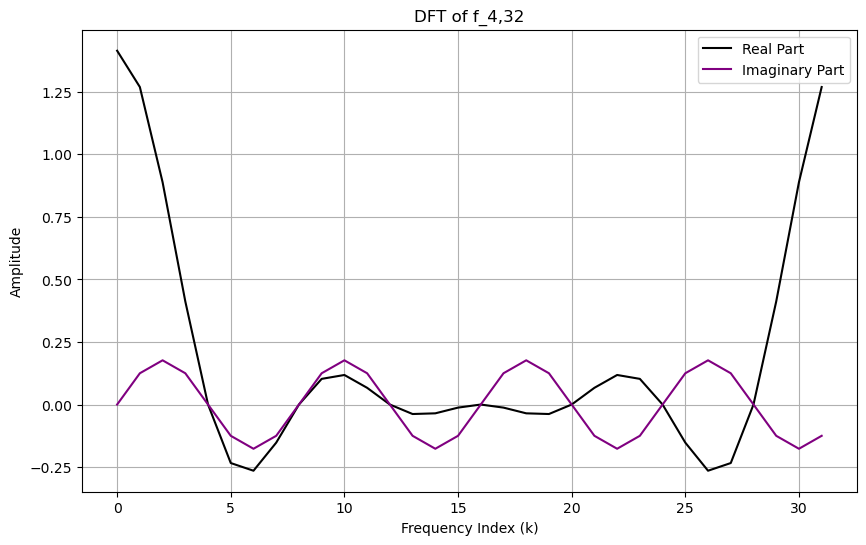

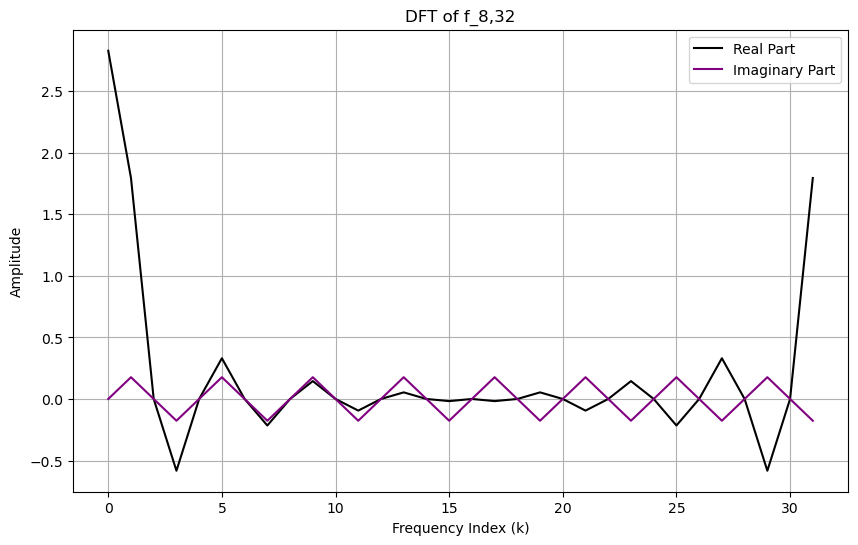

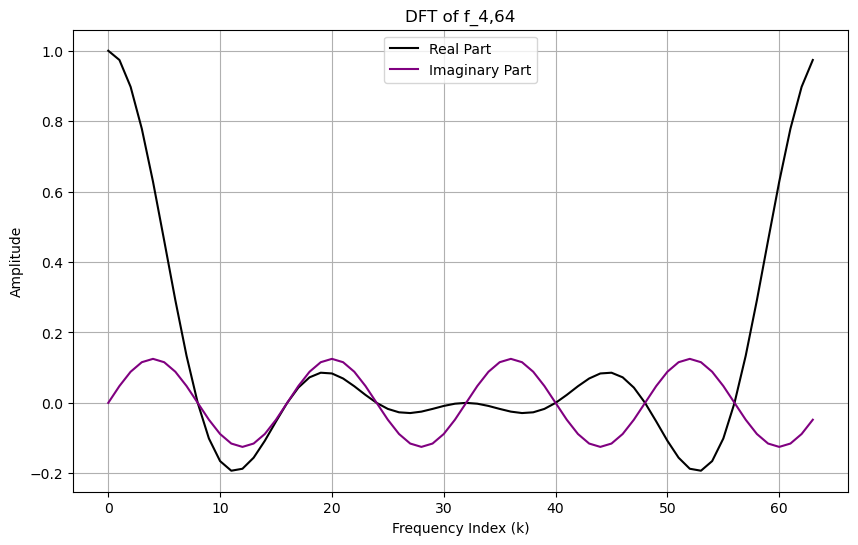

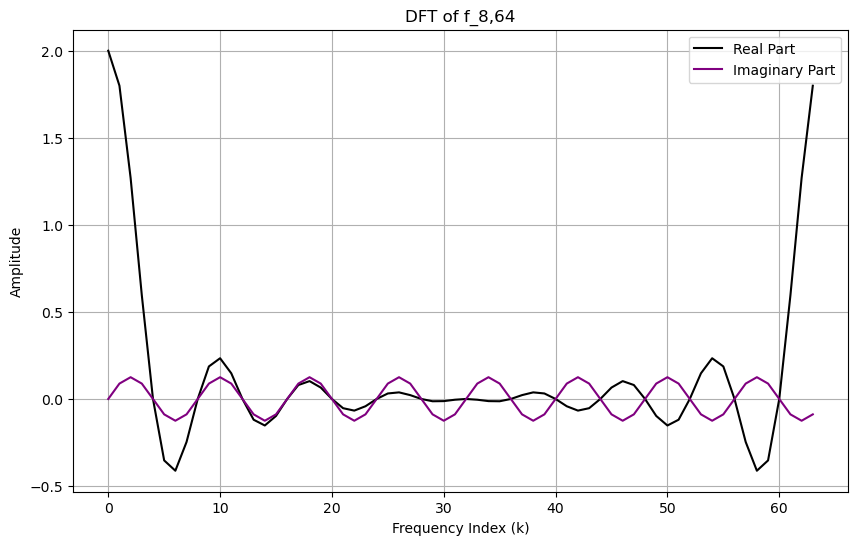

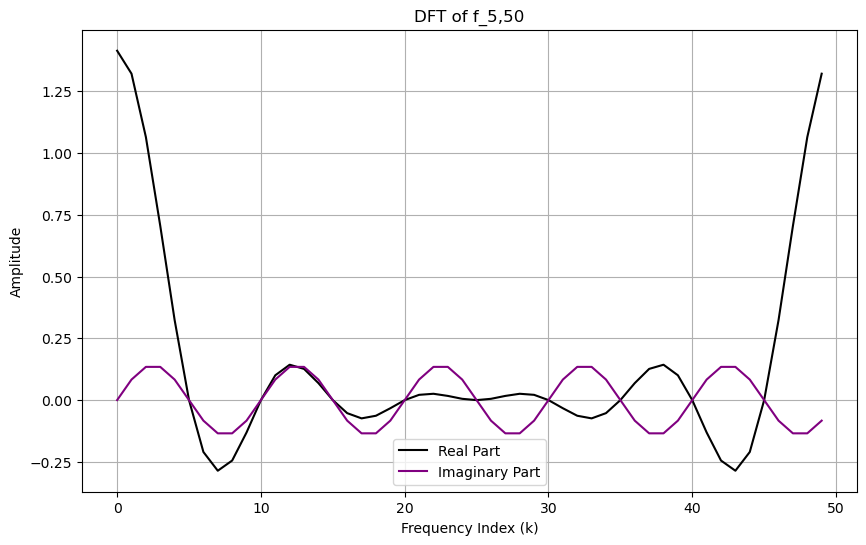

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_bump_signal(h, N):
    f = np.zeros(N)
    f[0:h] = 1
    f[N-h:N] = 1
    return f

def compute_dft(f):
    return dft(f)

def plot_dft(F, title):
    k = np.arange(len(F))
    plt.figure(figsize=(10, 6))
    plt.plot(k, F.real, 'k-', label='Real Part')
    plt.plot(k, F.imag, 'purple', label='Imaginary Part')
    plt.title(title)
    plt.xlabel('Frequency Index (k)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define parameters
signals = [(4, 32), (8, 32), (4, 64), (8, 64), (5, 50)]

# Compute and plot DFTs
for h, N in signals:
    f = rectangular_bump_signal(h, N)
    F = compute_dft(f)
    plot_dft(F, f'DFT of f_{h},{N}')

### Part 4

In [4]:
import numpy as np

def idft(signal):
    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    return 1/np.sqrt(N) * np.dot(e, signal)


def circular_convolution_dft(f, g):
    F = dft(f)
    G = dft(g)
    conv_result = idft(F * G)
    return conv_result.real  # Return only the real part since we expect real-valued output

def circular_convolution_direct(f, g):
    N = len(f)
    result = np.zeros(N)
    for n in range(N):
        for m in range(N):
            result[n] += f[m] * g[(n - m) % N]
    return result

# Test signals
f = np.array([1, 2, 3, 0])
g = np.array([0, 1, 0, 0.5])

# Circular convolution using DFT
conv_dft = circular_convolution_dft(f, g)

# Circular convolution using direct summation
conv_direct = circular_convolution_direct(f, g)

# Compare the results
print("Circular Convolution using DFT:", conv_dft)
print("Circular Convolution using Direct Summation:", conv_direct)

# Check if the results are the same
print("Are the results identical No, we need to multiply by sqrt(N)")

Circular Convolution using DFT: [0.5  1.25 1.   1.75]
Circular Convolution using Direct Summation: [1.  2.5 2.  3.5]
Are the results identical No, we need to multiply by sqrt(N)


### Part 5

In [27]:
import numpy as np


def linear_covolution_direct(f, g):
    N_f = len(f)
    N_g = len(g)
    N = N_f + N_g - 1
    result = np.zeros(N)
    for n in range(N):
        for m in range(N_f):
            if n - m >= 0 and n - m < N_g:
                result[n] += f[m] * g[n - m]
    return result

def linear_convolution_dft(f, g):
    N_f = len(f)
    N_g = len(g)
    N = N_f + N_g - 1
    
    # Zero-padding the signals to the same length N
    f_padded = np.pad(f, (0, N - N_f), mode='constant')
    g_padded = np.pad(g, (0, N - N_g), mode='constant')
    
    # Compute the DFT of the padded signals
    F = dft(f_padded)
    G = dft(g_padded)
    
    # Multiply in the frequency domain
    conv_result = idft(F * G)
    
    return conv_result  

# Given signals
f = np.array([1, 2, 3, 0])
g = np.array([0, 1, 0, 0.5])

# Linear convolution using DFT
conv_dft_linear = linear_convolution_dft(f, g)

# Linear convolution using direct summation (numpy's convolve function)
conv_direct_linear = linear_convolution_dft(f, g)

# Compare the results
print("Linear Convolution using DFT:", conv_dft_linear)
print("Linear Convolution using Direct Summation:", conv_direct_linear)

# Check if the results are the same
print("Are the results identical?", np.allclose(conv_dft_linear, conv_direct_linear))

Linear Convolution using DFT: [-1.25887458e-16-1.46868701e-16j  3.77964473e-01-1.25887458e-16j
  7.55928946e-01-1.25887458e-16j  1.32287566e+00-2.07189775e-16j
  3.77964473e-01+1.67849944e-16j  5.66946710e-01+2.93737402e-16j
  4.19624860e-17-1.67849944e-16j]
Linear Convolution using Direct Summation: [-1.25887458e-16-1.46868701e-16j  3.77964473e-01-1.25887458e-16j
  7.55928946e-01-1.25887458e-16j  1.32287566e+00-2.07189775e-16j
  3.77964473e-01+1.67849944e-16j  5.66946710e-01+2.93737402e-16j
  4.19624860e-17-1.67849944e-16j]
Are the results identical? True


### Part 6


When computing the DFT, the following sources of numerical errors occur:

1. *Exponential Term Error*: 
   - The exponential term $ e^{-i \frac{2\pi}{N} kn} $ is computed for each $ n $ and $ k $. Due to floating-point errors, this computation introduces an error:
     $$
     \tilde{e}^{-i \frac{2\pi}{N} kn} = e^{-i \frac{2\pi}{N} kn} \cdot (1 + \delta_{exp})
     $$
     where $ |\delta_{exp}| < c \cdot \epsilon_{\text{mach}} $. This error arises because the calculation of the exponential function in floating-point arithmetic is not exact.

2. *f error*:
   - $\tilde{f}[n] = f[n] \cdot (1 + \delta_f)$
   - Where $|\delta_f| < c \cdot \epsilon_{\text{mach}}$

3. *Multiplication Error*:
   - When multiplying the signal value $ f[n] $ by the exponential term, an additional error is introduced:
     $$
     \tilde{f}[n] \cdot \tilde{e}^{-i \frac{2\pi}{N} kn} = f[n] \cdot e^{-i \frac{2\pi}{N} kn} \cdot (1 + \delta_{exp}) \cdot (1+ \delta_f) \cdot (1 + \delta_{mult})
     $$
     where $ |\delta_{mult}| < c \cdot \epsilon_{\text{mach}} $. This reflects the combined error from the exponential computation and the floating-point multiplication.

4. *Summation Error*:
   - The summation over $ n $ of these terms introduces another source of error. For each sum in the DFT calculation, the relative error grows linearly with the number of terms summed:
     $$
     \tilde{F}[k] = \sum_{n=0}^{N-1} \tilde{f}[n] \cdot \tilde{e}^{-i \frac{2\pi}{N} kn}
     $$
     Expanding this sum and accounting for all errors, the total relative error in $ \tilde{F}[k] $ can be expressed as:
     $$
     \tilde{F}[k] = \sum_{n=0}^{N-1} \left( f[n] \cdot e^{-i \frac{2\pi}{N} kn} \cdot (1 + \delta_{exp}) \cdot (1+ \delta_f) \cdot (1 + \delta_{mult}) \right) \cdot (1 + \delta_{sum})
     $$
     Here, $ \delta_{sum} $ represents the error from summation, and $ |\delta_{sum}| $ scales with the number of terms summed, i.e., $ |\delta_{sum}| < N \cdot c \cdot \epsilon_{\text{mach}} $.
The total error in the computed DFT $ \tilde{F}[k] $ can be approximated by combining the individual error contributions. Since each operation introduces an error bounded by $ c \cdot \epsilon_{\text{mach}} $, the total relative error $ \delta_{\text{total}} $ can be bounded by:

$$
|\delta_{\text{total}}| \leq N \cdot (3c + 1) \cdot \epsilon_{\text{mach}}
$$
This bound is derived by considering the maximum error from all operations: exponentiation, multiplication, and summation.

## Q4

### Part 1

In [33]:
import numpy as np
import time

def fft(X):
    N = len(X)
    
    if N <= 1:
        return X
    
    if N % 2 != 0:
        raise ValueError("Size of X must be a power of 2")
    
    # Split the array into even and odd components
    Feven = dft(X[::2])
    Fodd = dft(X[1::2])
    
    # Combine
    combined = np.zeros(N, dtype=complex)
    for k in range(N // 2):
        t = np.exp(-2j * np.pi * k / N) * Fodd[k]
        combined[k] = (Feven[k] + t) / np.sqrt(2)
        combined[k + N // 2] = (Feven[k] - t) / np.sqrt(2)
    
    return combined

# Compare with built-in FFT and naive DFT


def compare_fft_methods():
    N = 1024
    X = np.random.random(N) + 1j * np.random.random(N)  # Random complex array
    
    # Cooley-Tukey FFT
    start_time = time.time()
    X_fft = fft(X)
    cooley_tukey_time = time.time() - start_time
    
    # Built-in FFT
    start_time = time.time()
    X_fft_builtin = np.fft.fft(X)
    builtin_time = time.time() - start_time
    
    # Naive DFT
    start_time = time.time()
    X_dft = dft(X)
    dft_time = time.time() - start_time
    
    # Accuracy Comparison
    cooley_tukey_error = np.linalg.norm(X_fft - X_fft_builtin)
    dft_error = np.linalg.norm(X_dft - X_fft_builtin)
    
    print(f"Cooley-Tukey FFT Time: {cooley_tukey_time:.6f} seconds")
    print(f"Built-in FFT Time: {builtin_time:.6f} seconds")
    print(f"Naive DFT Time: {dft_time:.6f} seconds")
    print(f"Cooley-Tukey FFT Error: {cooley_tukey_error:.6e}")
    print(f"Naive DFT Error: {dft_error:.6e}")

# Run the comparison
compare_fft_methods()

Cooley-Tukey FFT Time: 0.065502 seconds
Built-in FFT Time: 0.000000 seconds
Naive DFT Time: 0.089135 seconds
Cooley-Tukey FFT Error: 8.170173e+02
Naive DFT Error: 8.170173e+02


### Part 2

4.2
In the naive DFT, each output $ F[k] $ is computed as:

$$
F[k] = \sum_{n=0}^{N-1} f[n] \cdot e^{-i \frac{2\pi}{N} kn}
$$

For a signal of length $ N $, the naive DFT involves $ N^2 $ complex multiplications and additions. Assuming a relative error $ \delta $ for each floating-point operation, the total relative error in the naive DFT can be bounded by:

$$
|\delta_{\text{total}}| \leq N \cdot (3c + 1) \cdot \epsilon_{\text{mach}}
$$

where $ c $ is a constant dependent on the implementation.

The FFT algorithm reduces the complexity by breaking down the computation into smaller sub-problems. For an input of length $ N = 2^L $, the FFT algorithm divides the input into two halves, recursively computes the FFT of each half, and combines the results using the symmetry properties of the DFT.

At each stage of recursion, the FFT splits the input array and processes each half separately, introducing a relative error similar to the naive DFT, but with a reduced input size. The total error accumulates over $ \log_2(N) $ stages of recursion, with the relative error for each stage approximated as:

$$
|\delta_{\text{stage}}| \leq \frac{N}{2^i} \cdot (3c + 1) \cdot \epsilon_{\text{mach}}
$$

The cumulative error across all stages is:

$$
|\delta_{\text{FFT}}| \leq \sum_{i=1}^{\log_2(N)} \frac{N}{2^i} \cdot (3c + 1) \cdot \epsilon_{\text{mach}}
$$

This simplifies to:

$$
|\delta_{\text{FFT}}| \leq \log_2(N) \cdot (3c + 1) \cdot \epsilon_{\text{mach}}
$$

The FFT's numerical error grows logarithmically with the size of the input $ N $.

Comparing the DFT and FFT, the naive DFT has a computational complexity of $ O(N^2) $, meaning the error scales quadratically with $ N $, whereas the FFT has a complexity of $ O(N \log N) $, reducing the number of operations and leading to lower total error. The error in the DFT scales linearly with $ N $, while the error in the FFT scales logarithmically, making the FFT not only faster but also more numerically stable, especially for large $ N $.

### Part 3

The Cooley-Tukey FFT algorithm can be generalized to handle array sizes that are not powers of two by breaking the problem down into smaller DFTs of factors of the array size. For an array size $ N = 9 = 3 \times 3 $, the approach involves dividing the array into three smaller arrays, each of size 3, and then combining the results.

Given an array $ X[n] $ of size $ N = 9 $, divide it into three smaller arrays:
- $ X_0[n] $ consists of elements with indices that are multiples of 3: $ X_0[n] = X[3n] $ for $ n = 0, 1, 2 $.
- $ X_1[n] $ consists of elements with indices that give a remainder of 1 when divided by 3: $ X_1[n] = X[3n+1] $ for $ n = 0, 1, 2 $.
- $ X_2[n] $ consists of elements with indices that give a remainder of 2 when divided by 3: $ X_2[n] = X[3n+2] $ for $ n = 0, 1, 2 $.

Next, compute the DFT of each of these smaller arrays:
- $ F_0[k] = \text{DFT}(X_0) $ for $ k = 0, 1, 2 $.
- $ F_1[k] = \text{DFT}(X_1) $ for $ k = 0, 1, 2 $.
- $ F_2[k] = \text{DFT}(X_2) $ for $ k = 0, 1, 2 $.

Finally, combine the results to get the DFT of the original array $ X[n] $:

For $ k = 0, 1, 2 $:
$$
F[k] = F_0[k] + e^{-2i\pi k / 9} F_1[k] + e^{-2i\pi 2k / 9} F_2[k]
$$

For $ k = 3, 4, 5 $:
$$
F[k] = F_0[k-3] + e^{-2i\pi (k-3) / 9} \cdot e^{-2i\pi / 3} F_1[k-3] + e^{-2i\pi 2(k-3) / 9} \cdot e^{-4i\pi / 3} F_2[k-3]
$$

For $ k = 6, 7, 8 $:
$$
F[k] = F_0[k-6] + e^{-2i\pi (k-6) / 9} \cdot e^{-4i\pi / 3} F_1[k-6] + e^{-2i\pi 2(k-6) / 9} \cdot e^{-8i\pi / 3} F_2[k-6]
$$

For an array size $ N = 9 = 3 \times 3 $, the Cooley-Tukey FFT involves dividing the array into three smaller arrays of size 3, computing the DFT for each smaller array, and combining the results using the appropriate factors and shifts.

## Q5

### Part 1

We'll prove that $ h[k_x, k_y] = F[k_x, k_y] $

First, the 2D-DFT for an array $ f[x, y] $ is defined as:
$$
F[k_x, k_y] = \frac{1}{\sqrt{N_x N_y}} \sum_{x=0}^{N_x-1} \sum_{y=0}^{N_y-1} f[x, y] \exp\left(-2\pi i \left(\frac{k_x x}{N_x} + \frac{k_y y}{N_y}\right)\right)
$$
where $ k_x = 0, 1, \dots, N_x-1 $ and $ k_y = 0, 1, \dots, N_y-1 $.

We'll compute the 1-D DFT of the rows:

Let $ g[k_x, y] $ be the 1D-DFT of the $ y $-th row:
$$
g[k_x, y] = \frac{1}{\sqrt{N_x}} \sum_{x=0}^{N_x-1} f[x, y] \exp\left(-2\pi i \frac{k_x x}{N_x}\right)
$$
This computes the DFT along the $ x $-direction for each row $ y $ independently.

We'll compute 1-D DFT of Columns
Let $ h[k_x, k_y] $ be the 1D-DFT of the $ k_x $-th column of $ g $:
$$
h[k_x, k_y] = \frac{1}{\sqrt{N_y}} \sum_{y=0}^{N_y-1} g[k_x, y] \exp\left(-2\pi i \frac{k_y y}{N_y}\right)
$$
This computes the DFT along the $ y $-direction for each $ k_x $ independently.


Substituting the expression for $ g[k_x, y] $ into the formula for $ h[k_x, k_y] $:
$$
h[k_x, k_y] = \frac{1}{\sqrt{N_y}} \sum_{y=0}^{N_y-1} \left(\frac{1}{\sqrt{N_x}} \sum_{x=0}^{N_x-1} f[x, y] \exp\left(-2\pi i \frac{k_x x}{N_x}\right)\right) \exp\left(-2\pi i \frac{k_y y}{N_y}\right)
$$
Rearranging the sums:
$$
h[k_x, k_y] = \frac{1}{\sqrt{N_x N_y}} \sum_{x=0}^{N_x-1} \sum_{y=0}^{N_y-1} f[x, y] \exp\left(-2\pi i \frac{k_x x}{N_x}\right) \exp\left(-2\pi i \frac{k_y y}{N_y}\right)
$$
This can be rewritten as:
$$
h[k_x, k_y] = \frac{1}{\sqrt{N_x N_y}} \sum_{x=0}^{N_x-1} \sum_{y=0}^{N_y-1} f[x, y] \exp\left(-2\pi i \left(\frac{k_x x}{N_x} + \frac{k_y y}{N_y}\right)\right)
$$
which is exactly the definition of the 2D-DFT $ F[k_x, k_y] $.

Therefore, we have proven that:
$$
h[k_x, k_y] = F[k_x, k_y]
$$



### Part 2

In [79]:
import numpy as np
import time


#Effecient implementation of 2D DFT using fast approach
def fft_1d(x):
    N = len(x)
    if N <= 1:
        return x
    if N % 2 != 0:
        raise ValueError("Size of X must be a power of 2")
    
    Feven = dft(x[::2])
    Fodd = dft(x[1::2])
    
    combined = np.zeros(N, dtype=complex)
    for k in range(N // 2):
        t = np.exp(-2j * np.pi * k / N) * Fodd[k]
        combined[k] = (Feven[k] + t) / np.sqrt(N)
        combined[k + N // 2] = (Feven[k] - t) / np.sqrt(N)
    
    return combined

def fft_2d(f):
    Nx, Ny = f.shape
    
    # Apply 1D FFT to each row
    g = np.zeros((Nx, Ny), dtype=complex)
    for y in range(Ny):
        g[:, y] = fft_1d(f[:, y])
    
    # Apply 1D FFT to each column of the result
    h = np.zeros((Nx, Ny), dtype=complex)
    for x in range(Nx):
        h[x, :] = fft_1d(g[x, :])
    
    return h

def fft_2d_direct(f):
    Nx, Ny = f.shape
    F = np.zeros((Nx, Ny), dtype=complex)
    for kx in range(Nx):
        for ky in range(Ny):
            for x in range(Nx):
                for y in range(Ny):
                    F[kx, ky] += f[x, y] * np.exp(-2j * np.pi * (kx * x / Nx + ky * y / Ny))
    return F / np.sqrt(Nx * Ny)

def compare_2d_fft_methods():
    Nx, Ny = 64, 64
    f = np.random.random((Nx, Ny)) + 1j * np.random.random((Nx, Ny))  # Random complex matrix
    
    # Time the 2D FFT
    start_time = time.time()
    F_fft = fft_2d(f)
    fft_time = time.time() - start_time
    
    # Time the 2D DFT
    start_time = time.time()
    F_dft = fft_2d_direct(f)
    dft_time = time.time() - start_time
    
    # Compare accuracy
    fft_error = np.linalg.norm(F_fft - F_dft)
    
    print(f"2D FFT Time: {fft_time:.6f} seconds")
    print(f"2D DFT Time: {dft_time:.6f} seconds")
    print(f"2D FFT Error: {fft_error:.6e}")

# Run the comparison
compare_2d_fft_methods()

2D FFT Time: 0.030043 seconds
2D DFT Time: 17.612381 seconds
2D FFT Error: 5.071673e+01


### Part 3

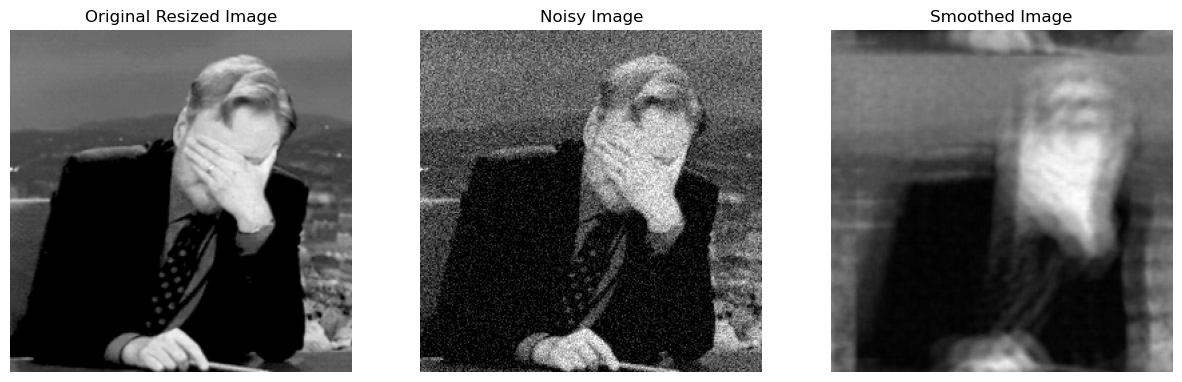

In [81]:
from scipy.fft import fft2, ifft2, fftshift
from scipy.ndimage import gaussian_filter
import cv2

def gaussian_kernel(size, sigma):
    # Generate a Gaussian kernel
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

def convolve_with_gaussian(image, kernel):
    # Apply convolution using FFT (Convolution Theorem)
    image_fft = fft2(image)
    kernel_fft = fft2(fftshift(kernel), s=image.shape)
    smoothed_image = ifft2(image_fft * kernel_fft).real
    return smoothed_image

def add_noise(image, noise_level):
    # Add Gaussian noise to an image
    noise = np.random.normal(0, noise_level, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)  # Ensure values are in [0, 1]

# Load and normalize an image using cv2

image_path = r"C:\Users\maorb\Pictures\Screenshots\Screenshot 2024-08-07 013007.png" # Replace this with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscaleimage = image.astype(np.float32) / 255.0  # Normalize to [0, 1]

if image is None:
    print("Error: Could not load image. Check the path provided.")
else:
    # Resize the image to an NxN shape
    N = 256  # Change this to the desired size
    image_resized = cv2.resize(image, (N, N))  # Resize to NxN
    image_resized = image_resized.astype(np.float32) / 255.0  # Normalize to [0, 1]

    # Generate a Gaussian kernel
    kernel_size = 21  # Size of the kernel
    sigma = 3.0  # Standard deviation of the Gaussian
    kernel = gaussian_kernel(kernel_size, sigma)

    # Add noise to the image
    noise_level = 0.1  # Noise level
    noisy_image = add_noise(image_resized, noise_level)

    # Apply the Gaussian smoothing
    smoothed_image = convolve_with_gaussian(noisy_image, kernel)

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Resized Image")
    plt.imshow(image_resized, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Smoothed Image")
    plt.imshow(smoothed_image, cmap='gray')
    plt.axis('off')

    plt.show()